# Part II - (Ford GoBike System Data)
## by (Abdulkadir Nafisat)

## Investigation Overview

> The aim of this investigation is to look deeper into the relationship between bike share and duration with other variables in the dataset.


## Dataset Overview

> The dataset been loaded is the cleaned version of the ford gobike dataset which was used in the first part of this work. it contains no null values and the right datatypes with 174952 columns and 12 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('Project3_clean.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               174952 non-null  int64 
 1   duration_sec             174952 non-null  int64 
 2   start_time               174952 non-null  object
 3   end_time                 174952 non-null  object
 4   start_station_name       174952 non-null  object
 5   end_station_name         174952 non-null  object
 6   bike_id                  174952 non-null  int64 
 7   user_type                174952 non-null  object
 8   member_birth_year        174952 non-null  int64 
 9   member_gender            174952 non-null  object
 10  bike_share_for_all_trip  174952 non-null  object
dtypes: int64(4), object(7)
memory usage: 14.7+ MB


In [3]:
data.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No


## (Visualization 1)

> We Check to see the bike Id with the most Duration and go further to visualize the top ten of them. 

> From this visualization Results showed that the bike id with the highest duration was bike id '6301' who is a subscriber user type .


In [4]:
data.sort_values(by = "duration_sec", ascending=False ).head(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
81604,85465,84548,2019-02-16 15:48:25.029,2019-02-17 15:17:33.080,Powell St BART Station (Market St at 4th St),Myrtle St at Polk St,6301,Subscriber,1981,Male,No
122163,127999,83519,2019-02-09 15:16:17.537,2019-02-10 14:28:17.270,Page St at Scott St,San Francisco Public Library (Grove St at Hyde...,5561,Customer,1990,Male,No
107291,112435,83407,2019-02-11 16:25:33.069,2019-02-12 15:35:40.956,11th St at Natoma St,16th St Depot,1842,Customer,1988,Male,No
4987,5203,83195,2019-02-27 14:47:23.181,2019-02-28 13:53:58.433,Bancroft Way at College Ave,Telegraph Ave at Ashby Ave,5781,Subscriber,1962,Female,Yes
91253,95750,82512,2019-02-14 13:56:21.728,2019-02-15 12:51:34.315,Myrtle St at Polk St,Civic Center/UN Plaza BART Station (Market St ...,6152,Customer,1998,Other,No
8291,8631,81549,2019-02-27 09:41:38.552,2019-02-28 08:20:48.386,Jersey St at Church St,Cesar Chavez St at Dolores St,2266,Subscriber,1963,Female,No
102616,107581,79548,2019-02-12 17:45:50.536,2019-02-13 15:51:38.859,7th St at Brannan St,3rd St at Townsend St,1718,Customer,1995,Female,No
85962,90195,74408,2019-02-15 16:54:01.060,2019-02-16 13:34:09.367,Powell St BART Station (Market St at 4th St),Market St at Dolores St,4714,Subscriber,1988,Male,No
82496,86454,74097,2019-02-16 16:20:41.465,2019-02-17 12:55:38.467,Folsom St at 15th St,Garfield Square (25th St at Harrison St),6235,Subscriber,1980,Male,No
117808,123383,73930,2019-02-10 13:03:36.404,2019-02-11 09:35:46.446,Ninth St at Heinz Ave,Ninth St at Heinz Ave,1333,Subscriber,1989,Female,No


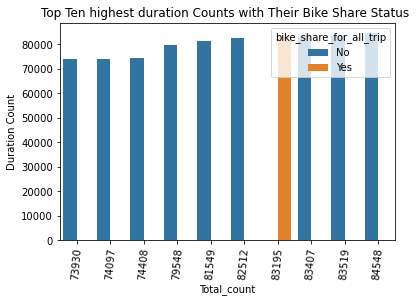

In [5]:
ax = sb.barplot(
    data.sort_values(by = "duration_sec", ascending=False ).head(10).duration_sec,
     data.sort_values(by = "duration_sec", ascending=False).head(10).duration_sec,
     hue=data['bike_share_for_all_trip'])

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='Total_count', ylabel='Duration Count', title = 'Top Ten highest duration Counts with Their Bike Share Status ')
plt.show()

## (Visualization 2)

> For the Second visualization we check for the Distribution of count of bike rides per user_type across the Various Gender

> From the visualization we can see that the Male Subscribers Tend to go on longer Trips the most

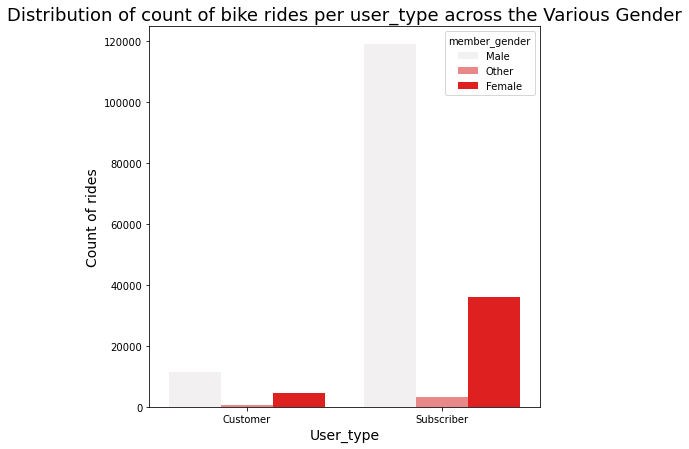

In [6]:
plt.figure(figsize=(7,7))


sb.countplot(data=data, x='user_type', hue='member_gender', color='red')
plt.xlabel('User_type', fontsize=14)
plt.ylabel('Count of rides', fontsize=14)
plt.title('Distribution of count of bike rides per user_type across the Various Gender', fontsize=18);

## (Visualization 3)

> For the Second Visualization, we check to see Member Birth Year distribution and time spent on Rideshare.

> The Scatterred plot showed that users born in later years were more likely to no share bikes also, they spend longer duration on Trips.  

Text(0.5, 1.0, 'facetgrid of Member Birth Year distribution and time spent on Rideshare')

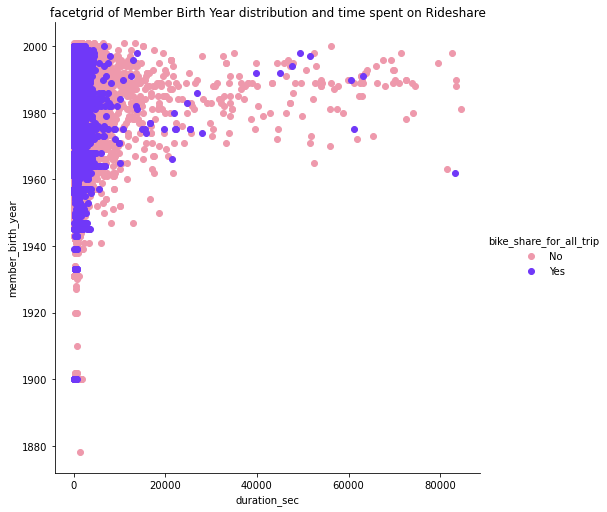

In [7]:
type_colors = {'No': '#ee99ac', 'Yes': '#7038f8'}
g = sb.FacetGrid(data = data, hue = 'bike_share_for_all_trip', height = 7, palette= type_colors)
g.map(plt.scatter, 'duration_sec', 'member_birth_year')
g.add_legend()
plt.title('facetgrid of Member Birth Year distribution and time spent on Rideshare')

In [8]:
Top_station_list = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St',
                   'Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)','San Francisco Caltrain (Townsend St at 4th St)'
                   'San Francisco Ferry Building (Harry Bridges Plaza)','Howard St at Beale St','Steuart St at Market St', 'Powell St BART Station (Market St at 5th St)']
high_start_station = data[data['start_station_name'] == 'Market St at 10th St']
high_start_station

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
35,38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,Market St at 10th St,29th St at Church St,5938,Subscriber,1992,Female,No
50,54,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,Market St at 10th St,Victoria Manalo Draves Park,5407,Subscriber,1990,Female,No
105,110,371,2019-02-28 23:01:15.077,2019-02-28 23:07:26.459,Market St at 10th St,Valencia St at 16th St,6435,Subscriber,1994,Male,No
109,114,376,2019-02-28 23:00:05.223,2019-02-28 23:06:21.515,Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),5731,Subscriber,1982,Male,No
183,190,515,2019-02-28 22:28:11.347,2019-02-28 22:36:46.389,Market St at 10th St,5th St at Folsom,5234,Subscriber,1981,Other,No
...,...,...,...,...,...,...,...,...,...,...,...
174841,183293,477,2019-02-01 05:26:32.609,2019-02-01 05:34:30.132,Market St at 10th St,Irwin St at 8th St,4369,Subscriber,1971,Male,No
174905,183362,899,2019-02-01 01:08:39.015,2019-02-01 01:23:38.798,Market St at 10th St,Valencia St at 22nd St,2033,Subscriber,1999,Male,No
174906,183364,892,2019-02-01 01:08:43.731,2019-02-01 01:23:35.763,Market St at 10th St,Valencia St at 22nd St,3392,Subscriber,2000,Male,No
174907,183365,932,2019-02-01 01:07:51.908,2019-02-01 01:23:24.370,Market St at 10th St,Valencia St at 22nd St,4962,Subscriber,2000,Female,No


>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [9]:
#!jupyter nbconvert <Part_II_slide_deck_template.ipynb>.ipynb --to slides --post serve --no-input --no-prompt
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 682526 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User PC\miniconda3\envs\oyiza\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\User PC\miniconda3\envs\oyiza\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\User PC\miniconda3\envs\oyiza\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\User PC\miniconda3\envs\oyiza\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\User PC\miniconda3\envs\oyiza\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in conve

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 